In [4]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [5]:
#Load train test data sets
train_df=pd.read_csv("C:/Users/Swaki2/Desktop/NYCDSA/PYTHON/ML/ML Project- House Prices/train.csv")

In [6]:
train_df.head()
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
test_df=pd.read_csv("C:/Users/Swaki2/Desktop/NYCDSA/PYTHON/ML/ML Project- House Prices/test.csv")

In [8]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
train_df.shape

(1460, 81)

In [10]:
test_df.shape

(1459, 80)

In [ ]:
#because there is no target variable in the test set, it is one column less than the train set

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [12]:
train_df.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [13]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
num=[]
cat=[]
for col in train_df.columns:
    if train_df.dtypes[col]=='object':
        cat.append(col)
    else:
        num.append(col)
    

In [15]:
print(num)
print(cat)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gara

In [16]:
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [17]:
corr=train_df.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [ ]:
# Below features has correlation >0.5, so we can say these are the important features
#OverallQual      0.790982
#GrLivArea        0.708624
#GarageCars       0.640409
#GarageArea       0.623431
#TotalBsmtSF      0.613581
#1stFlrSF         0.605852
#FullBath         0.560664
#TotRmsAbvGrd     0.533723
#YearBuilt        0.522897
#YearRemodAdd     0.507101

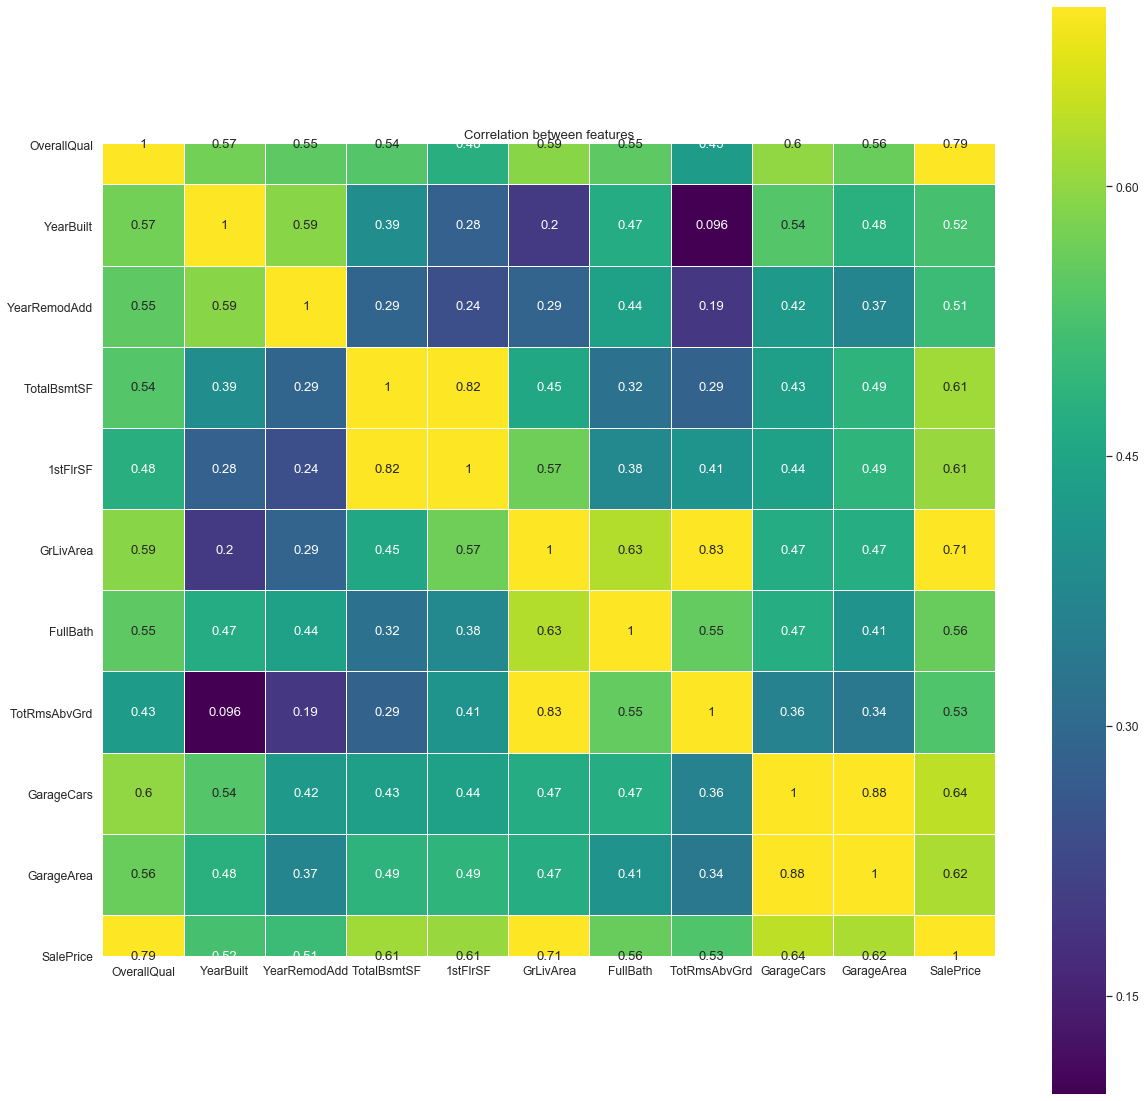

In [18]:
corr_matrix=train_df.corr()
top_features=corr_matrix.index[abs(corr_matrix['SalePrice'])>0.5]
sns.set(font_scale=1.10)
plt.figure(figsize=(20, 20))
sns.heatmap(train_df[top_features].corr(), vmax=0.7,linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

In [19]:
#treating null values
#treating categorical features--get dummies
null_cols=train_df.columns[train_df.isnull().any()]
train_df[null_cols].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

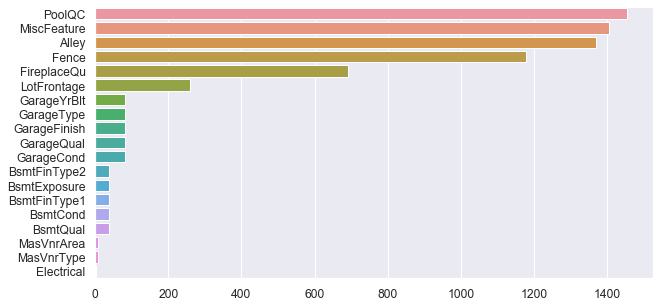

In [20]:
fig=plt.figure(figsize=(10,5))
train_null=train_df.isnull().sum()[train_df.isnull().sum()!=0].sort_values(ascending=False)
sns.barplot(y=train_null.index,x=train_null)

In [21]:
#Filling all the missing values both numerical and categorical
train_df.fillna({'Alley': 'None', 'Fence':'None', 'MiscFeature':'None', 
           'PoolQC':'None', 'FireplaceQu':'None', 'MasVnrType':'None'}, inplace = True)

#Meaning that there is no basement(Categorical).
train_df.fillna({'BsmtQual':'None', 'BsmtCond':'None',
           'BsmtExposure':'None', 'BsmtFinType1':'None',
           'BsmtFinType2':'None'},inplace=True)

#Missing Basement Columns(Numerical)
Bsmt_con = ['MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
            'BsmtFullBath','BsmtHalfBath','BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF']
for Bsmt in Bsmt_con:
    train_df[Bsmt].fillna(0, inplace=True) 
    
#missing Garage columns(Categorical)
train_df.fillna({'GarageType':'None','GarageCond': 'None', 'GarageQual':'None', 
           'GarageQual':'None', 'GarageFinish': 'None'}, inplace=True)

#Missing Garage Columns(Numerical)
train_df.fillna({'GarageCars':0, 'GarageArea': 0}, inplace = True)

#Replacing Other categorical variable with its mode
train_df['MSZoning']=train_df['MSZoning'].fillna(train_df['MSZoning'].mode()[0])
train_df['Electrical']=train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])
train_df['Functional']=train_df['Functional'].fillna(train_df['Functional'].mode()[0])
train_df['KitchenQual']=train_df['KitchenQual'].fillna(train_df['KitchenQual'].mode()[0])
train_df['SaleType']=train_df['SaleType'].fillna(train_df['SaleType'].mode()[0])
train_df['Utilities']=train_df['Utilities'].fillna(train_df['Utilities'].mode()[0])
train_df['LotFrontage']=train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['GarageYrBlt']=train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median())


train_df['Exterior1st'].fillna('Other' ,inplace=True)
train_df['Exterior2nd'].fillna('Other' ,inplace=True)

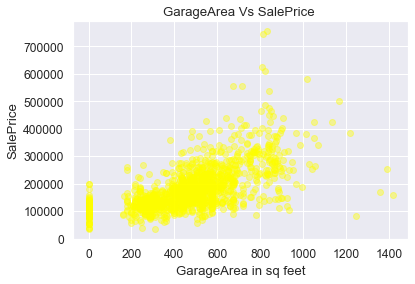

In [22]:
#Multi variate analysis
plt.scatter(train_df["GarageArea"],train_df["SalePrice"], color='yellow',alpha=0.4)
plt.title("GarageArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("GarageArea in sq feet");

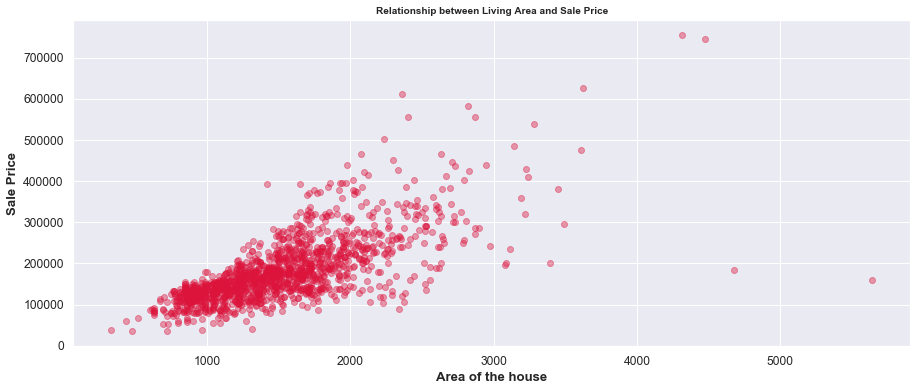

In [23]:
#GrLivArea
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = train_df, color='crimson', alpha=0.4)
plt.title('Relationship between Living Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Area of the house', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

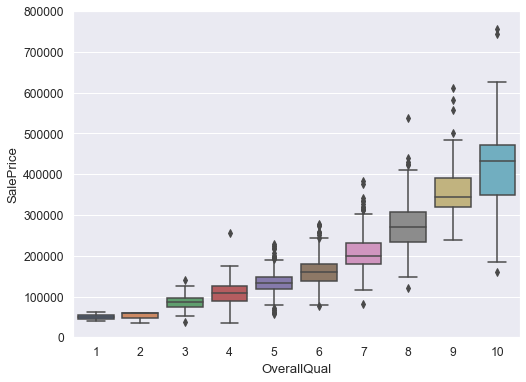

In [24]:
data = pd.concat([train_df['SalePrice'], train_df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train_df['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

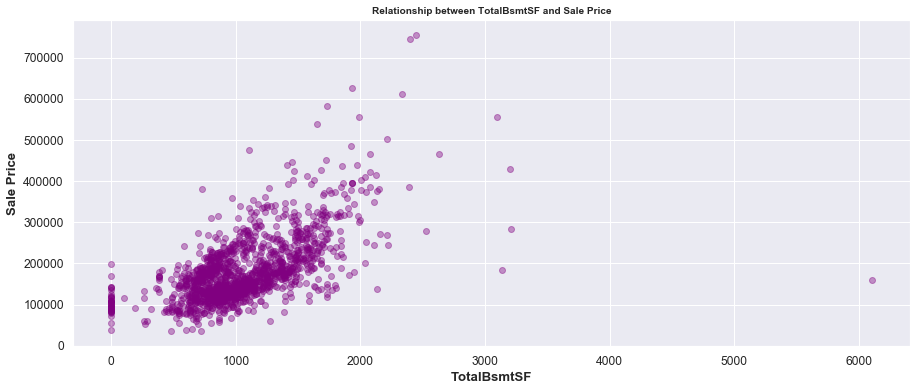

In [25]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = train_df, color='purple', alpha=0.4)
plt.title('Relationship between TotalBsmtSF and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('TotalBsmtSF', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

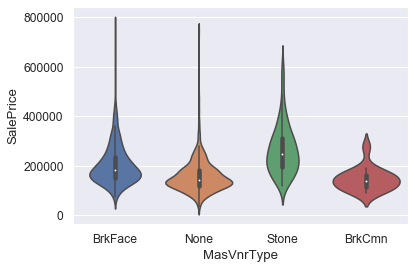

In [26]:
sns.violinplot("MasVnrType","SalePrice",data=train_df);

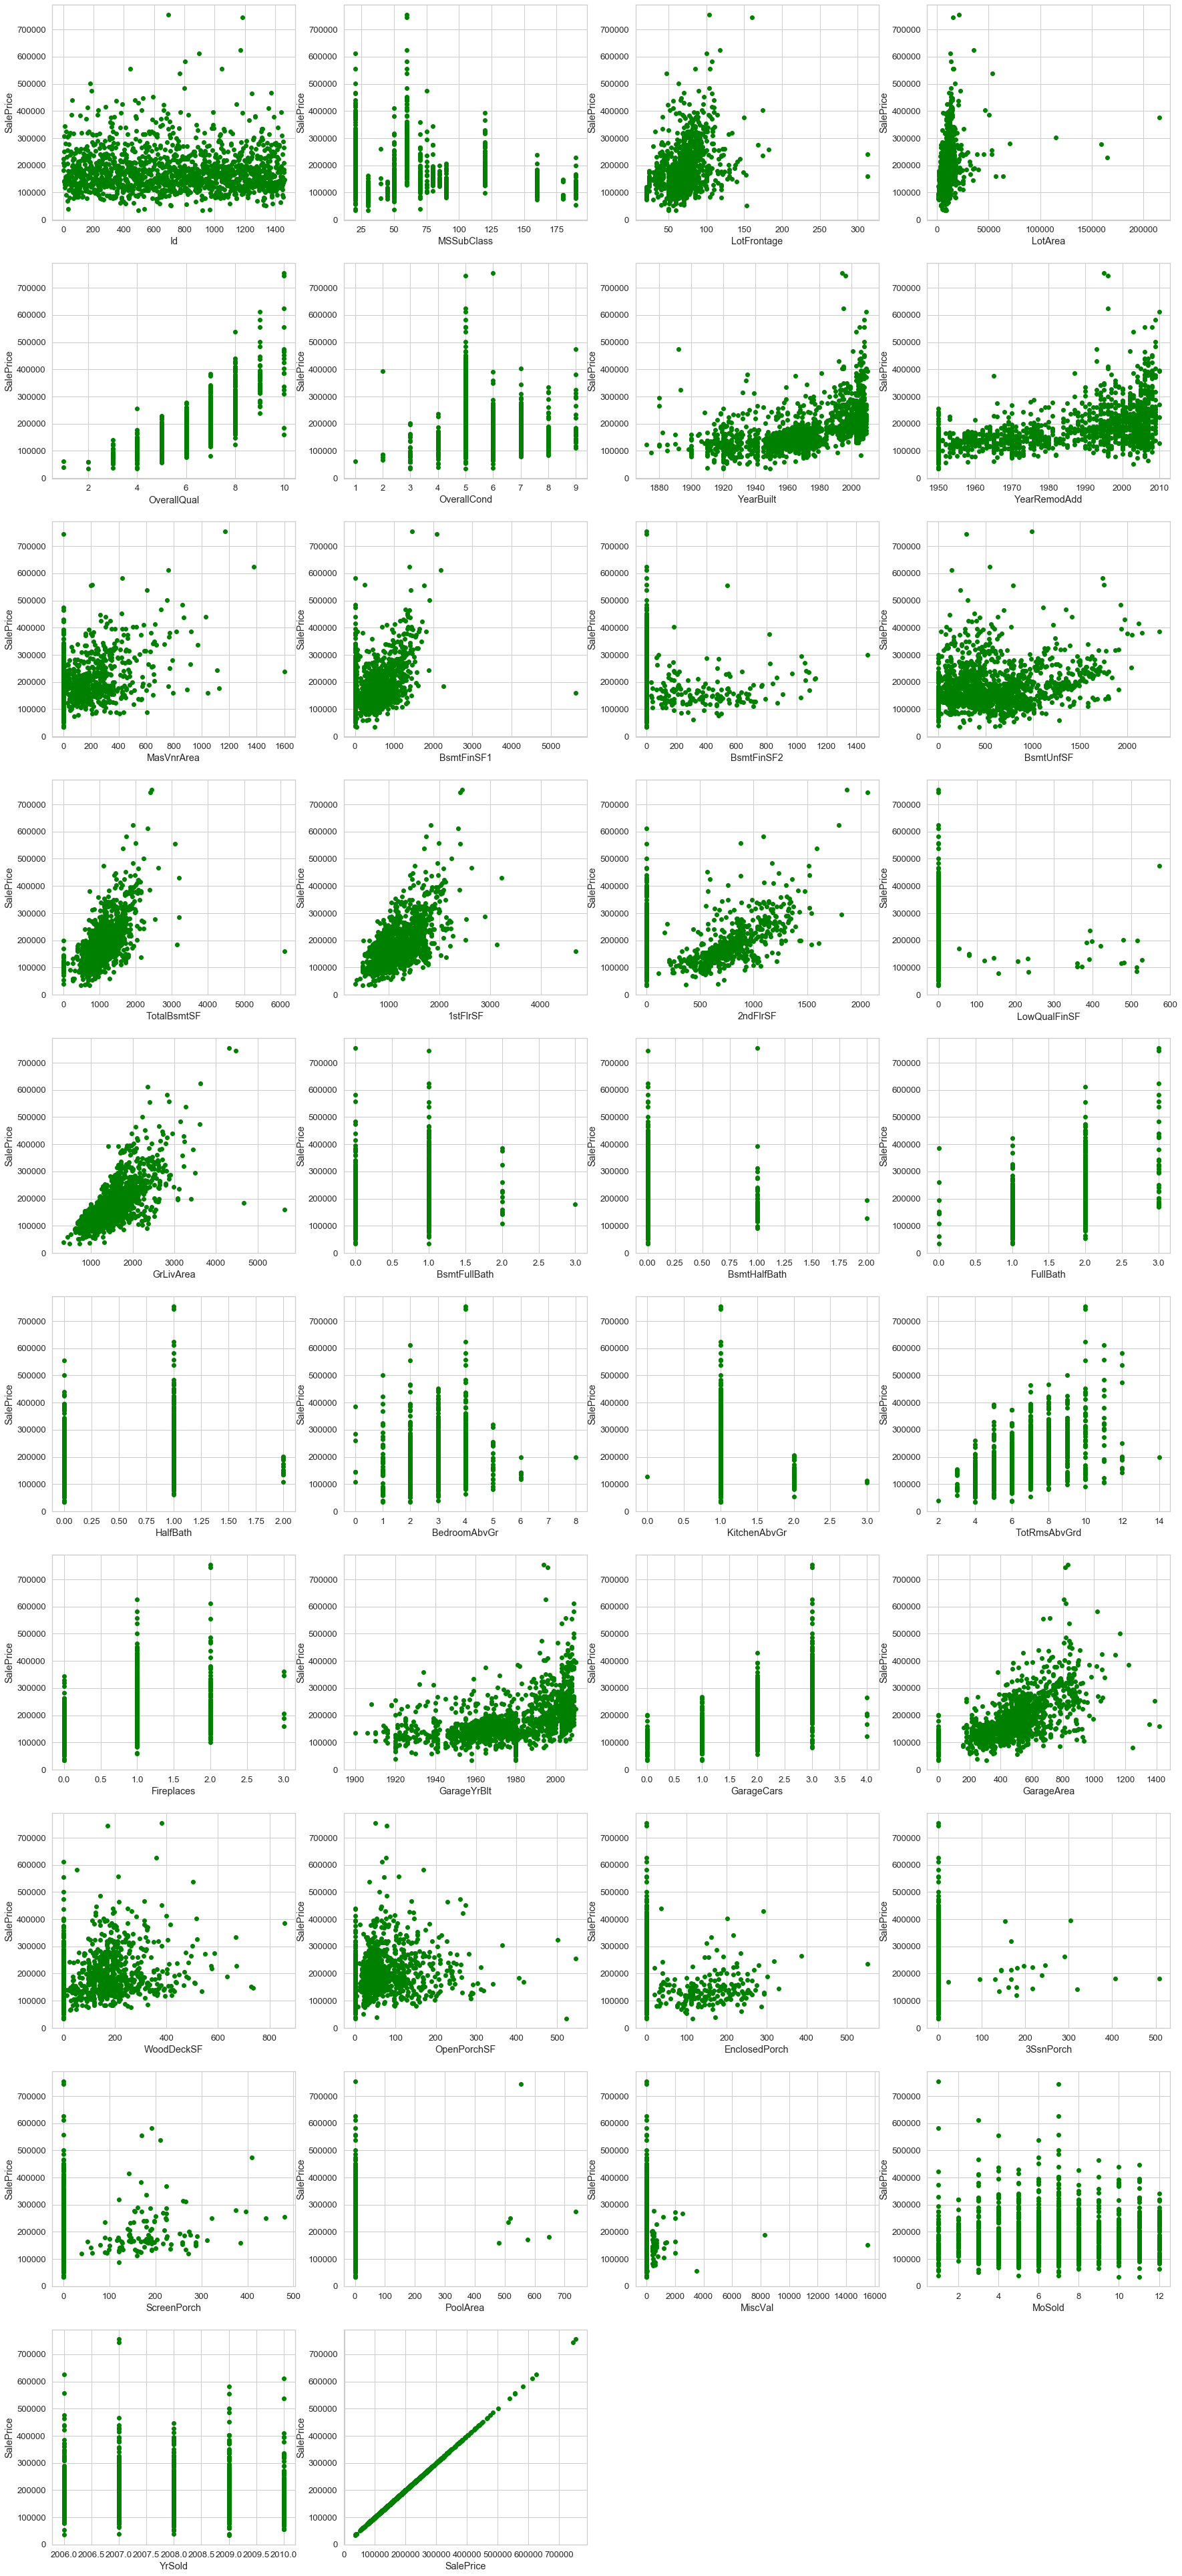

In [27]:
#handling outliers
plt.figure(figsize=(30, 70))
sns.set(font_scale= 1.2)
sns.set_style('whitegrid')

for i, features in enumerate(num):
    plt.subplot(10, 4, i+1)
    plt.scatter(data=train_df.iloc[:len(train_df)], x=features, y='SalePrice', color ="green")
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    

In [ ]:
#from above graphs we can see the varibles LotArea, MasVnrArea, BsmtFinsf1, TotalBsmtsf, 1stFlrsf, 2ndFlrsf, GrLivArea, GrageArea this variables have high outliers. means extremely large areas for very low prices. so we replace these outliers by its lower values.


In [28]:
#Remove outliers

train_df.LotArea[(train_df.LotArea >= 75000)] = 75000
train_df.MasVnrArea[(train_df.MasVnrArea >= 1000)] = 1000
train_df.BsmtFinSF1[(train_df.BsmtFinSF1 >= 2500)] = 2500
train_df.TotalBsmtSF[(train_df.TotalBsmtSF >= 3000)] = 3000
train_df['1stFlrSF'][(train_df['1stFlrSF'] >= 3000)] = 3000
train_df.GrLivArea[(train_df.GrLivArea >= 3500)] = 3500
train_df.GarageArea[(train_df.GarageArea >= 1500)] = 1500

In [29]:
#Handling Categorical variables
num=[]
cat=[]
for col in train_df.columns:
    if train_df.dtypes[col]=='object':
        cat.append(col)
    else:
        num.append(col)


In [30]:
train_df =pd.get_dummies(train_df, columns=cat, drop_first=True)

In [31]:
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']

In [32]:
del train_df['TotalBsmtSF']
del train_df['1stFlrSF']
del train_df['2ndFlrSF']

In [33]:
new_train = train_df.iloc[:1460,:]
new_test = train_df.iloc[1460:,:]

In [34]:
x = new_train.drop(['SalePrice'], axis=1)
y = new_train['SalePrice']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [36]:
#Lasso regressor
Lasso_reg =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1]]}

Lasso_reg=GridSearchCV(Lasso_reg, param_grid=parameters)
Lasso_reg.fit(X_train,y_train)
print("The best value of Alpha is: ",Lasso_reg.best_params_)
print("The best score using Lasso is: ",Lasso_reg.best_score_)

The best value of Alpha is:  {'alpha': 0.1}
The best score using Lasso is:  0.7213401557940478


In [37]:
#ridge regressor
ridge=Ridge()
parameters= {'alpha':[x for x in [0.1,0.2,0.4,0.5,0.7,0.8]]}

ridge_reg=GridSearchCV(ridge, param_grid=parameters)
ridge_reg.fit(X_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score using Ridge is: ",ridge_reg.best_score_)

The best value of Alpha is:  {'alpha': 0.8}
The best score using Ridge is:  0.8018336532453179


In [39]:
#random forest regressor
rf = RandomForestRegressor(n_estimators=1500,max_features='sqrt',max_depth=5)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)


In [61]:
RFR=rf.score(X_test,y_test)
print('The score using RandomForestRegressor is ',round(a1*100,2))


The score using RandomForestRegressor is  78.21


In [41]:
#Gradient boosting
gbr = GradientBoostingRegressor(n_estimators=1500,learning_rate=0.01,max_depth=5)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

In [62]:
GBR=gbr.score(X_test, y_test)
print('The score using GradientBoostingRegressor is ',round(a*100,2))

The score using GradientBoostingRegressor is  89.45


In [53]:
#Support vecotr regressor
svm = SVR()
clfsvm = GridSearchCV(svm, param_grid = {'kernel': ['rbf', 'linear'], 'C': [0.1, 0.5, 1, 2],cv=10})
clfsvm.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 2], 'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
print('The best score for SVM is given by the parameters {} which is {}'.format(clfsvm.best_params_, clfsvm.best_score_))

The best score for SVM is given by the parameters {'C': 2, 'kernel': 'linear'} which is 0.7523121162001218


In [56]:
#K nearest neighbours
knn = KNeighborsRegressor()
clfknn = GridSearchCV(knn, param_grid = {'n_neighbors': [5,7,10], 'weights': ['uniform', 'distance']}, cv = 10)
clfknn.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [5, 7, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
print('The best score for KNN is given by the parameters {} which is {}'.format(clfknn.best_params_, clfknn.best_score_))

The best score for KNN is given by the parameters {'n_neighbors': 10, 'weights': 'distance'} which is 0.6688017379368254


In [58]:
#XGBoost regressor
xgb = XGBRegressor()
clfxg = GridSearchCV(xgb, param_grid = {'n_estimators': np.arange(100, 160, 20), 'learning_rate': np.arange(0.1, 1,0.2)}, cv = 10)
clfxg.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrai...
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_p

In [59]:
print('The best score for XGBoost is given by the parameters {} which is {}'.format(clfxg.best_params_, clfxg.best_score_))

The best score for XGBoost is given by the parameters {'learning_rate': 0.1, 'n_estimators': 140} which is 0.84775759155209


In [66]:
models = ['Lasso','Ridge', 'Random Forest', 'KNN','GradientBoost', 'XgBoost', 'SVM']
scores = [Lasso_reg.best_score_, ridge_reg.best_score_, RFR, clfknn.best_score_, GBR, clfxg.best_score_, clfsvm.best_score_]
score_df=pd.DataFrame(data=scores, index=models,columns=['Score'] )


In [64]:
score_df.sort_values(by = 'Score', ascending = False)

,Score
GradientBoost,0.894549
XgBoost,0.847758
Ridge,0.801834
Random Forest,0.782055
SVM,0.752312
Lasso,0.721340
KNN,0.668802


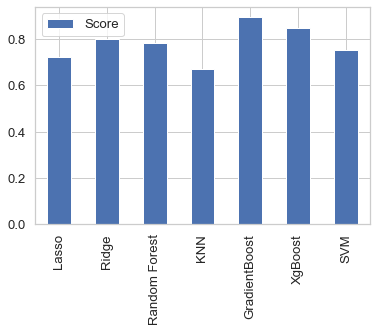

In [69]:
ax=score_df.plot.bar(rot=90)

In [ ]:
#from the graph above Gradient boost model predicted the best score 

In [73]:
X=train_df.drop(['SalePrice'],axis=1)
y=train_df['SalePrice']

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [75]:
model = GradientBoostingRegressor(n_estimators=1500,learning_rate=0.01,max_depth=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [76]:
a=model.score(X_test, y_test)
print('The score using GradientBoostingRegressor is ',round(a*100,2))

The score using GradientBoostingRegressor is  88.65


In [ ]:
#testing the Gradient boosting predicting the saleprice is 88.65 which is slightly less than the 89.4 